Silicon nano-sphere
============================

Comparing pyGDM to Mie theory for a silicon nano-sphere (D=150nm).

Modules:

In [1]:
from pyGDM2 import structures
from pyGDM2 import materials
from pyGDM2 import fields

from pyGDM2 import core
from pyGDM2 import tools
from pyGDM2 import linear
from pyGDM2 import visu

import numpy as np
import matplotlib.pyplot as plt


## --- load pre-calculated Mie-data
wl_mie, qext_mie, qsca_mie = np.loadtxt("scat_mie_Si_D150nm.txt").T
qabs_mie = qext_mie - qsca_mie

Simulation setup
--------------------

/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/visu.py:48: UserWarning: 3D data. Falling back to XY projection...
  warnings.warn("3D data. Falling back to XY projection...")


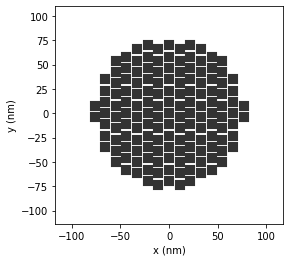

(hex) ----- N_dipoles = 1159

In [2]:
## --- Setup incident field
field_generator = fields.planewave
## log-interval spectrum (denser at low lambda):
wavelengths = np.exp(np.linspace(np.log(300), np.log(1000), 50))
kwargs = dict(theta = [0.0])
efield = fields.efield(field_generator, wavelengths=wavelengths, 
                                                   kwargs=kwargs)

scale_factor = 1.4
step = 18.75/scale_factor
radius = 4.*scale_factor
geometry = structures.sphere(step, R=radius, mesh='hex', ORIENTATION=2)

material = materials.silicon()
n1, n2 = 1.0, 1.0     # vacuum env.

struct = structures.struct(step, geometry, material, n1,n2, 
                                   structures.get_normalization('hex'))


sim = core.simulation(struct, efield)

visu.structure(sim)
print('(hex) ----- N_dipoles =', len(sim.struct.geometry), end='')

Run the simulation
--------------------------

In [3]:
## main simulation
E = core.scatter(sim, method='lu', verbose=True)

## extinction spectrum
field_kwargs = tools.get_possible_field_params_spectra(sim)[0]
wl, spec = tools.calculate_spectrum(sim, field_kwargs, linear.extinct)
a_ext, a_sca, a_abs = spec.T
a_geo = tools.get_geometric_cross_section(sim)

timing for wl=300.00nm - setup: 1465.2 ms, inv.: 1290.8 ms, repropa.: 13.3ms (1 field configs), tot: 2769.5 ms
timing for wl=307.46nm - setup: 3275.0 ms, inv.: 1287.5 ms, repropa.: 14.1ms (1 field configs), tot: 4584.7 ms
timing for wl=315.11nm - setup: 2715.6 ms, inv.: 1289.8 ms, repropa.: 14.6ms (1 field configs), tot: 4027.8 ms
timing for wl=322.95nm - setup: 3494.2 ms, inv.: 1308.4 ms, repropa.: 19.5ms (1 field configs), tot: 4830.8 ms
timing for wl=330.98nm - setup: 3202.2 ms, inv.: 3658.9 ms, repropa.: 26.5ms (1 field configs), tot: 6906.6 ms
timing for wl=339.22nm - setup: 10199.3 ms, inv.: 1355.3 ms, repropa.: 13.7ms (1 field configs), tot: 11576.9 ms
timing for wl=347.65nm - setup: 2668.3 ms, inv.: 1450.2 ms, repropa.: 12.8ms (1 field configs), tot: 4140.1 ms
timing for wl=356.30nm - setup: 1495.2 ms, inv.: 1363.6 ms, repropa.: 14.7ms (1 field configs), tot: 2881.8 ms
timing for wl=365.17nm - setup: 2692.9 ms, inv.: 1271.9 ms, repropa.: 14.4ms (1 field configs), tot: 3987.7 ms

/home/hans/.local/lib/python3.7/site-packages/pyGDM2-1.1rc1-py3.7-linux-x86_64.egg/pyGDM2/linear.py:105: UserWarning: Info: The fortran code underlying 'extinct' will be replaced by a python/numpy implementation in one of the next releases. The new implementation can be tested by using the `linear_py` instead of the `linear` module.
  "The new implementation can be tested by using the `linear_py` " +


Plot the spectrum
---------------------------

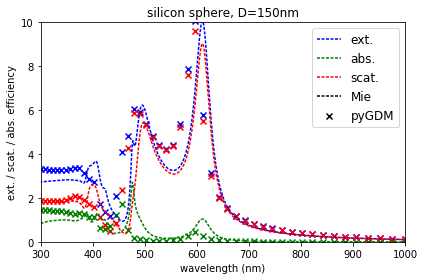

In [4]:
plt.figure()
plt.title("silicon sphere, D=150nm")

## --- Mie
plt.plot(wl_mie, qext_mie, 'b--', dashes=[2,1],label='ext.')
plt.plot(wl_mie, qabs_mie, 'g--', dashes=[2,1],label='abs.')
plt.plot(wl_mie, qsca_mie, 'r--', dashes=[2,1],label='scat.')

## --- pyGDM
plt.scatter(wl, a_ext/a_geo, marker='x', linewidth=1.5, color='b', label='')
plt.scatter(wl, a_abs/a_geo, marker='x', linewidth=1.5, color='g', label='')
plt.scatter(wl, a_sca/a_geo, marker='x', linewidth=1.5, color='r', label='')

## --- for legend only
plt.plot([0], [0], 'k--', dashes=[2,1], label='Mie')
plt.scatter([0], [0], marker='x', linewidth=1.5, color='k', label='pyGDM')
## -- legend
plt.legend(loc='best', fontsize=12)


plt.xlabel("wavelength (nm)")
plt.ylabel("ext. / scat. / abs. efficiency")
plt.xlim( [wl.min(), wl.max()] )
plt.ylim( [0, 10] )


plt.tight_layout()
plt.show()

The agreement with Mie theory is ok but not ideal. This can be easily improved by increasing the number of meshpoints (see our paper), which increases of course the simulation time, for which reason we stick to a coarser mesh for this demonstration.